In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [2]:
import sqlite3
conn = sqlite3.connect('TestDB.db')
c = conn.cursor

In [3]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
import pandas_datareader.data as web

**Macroeconomics variables for the analysis:**

- Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
- Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
- 5-Year, 5-Year Forward Inflation Expectation Rate (T5YIFRM)
- Retail Sales: Retail Trade and Food Services (MRTSSM44X72USS)
- Industrial Production: Total Index (INDPRO)
- Real gross domestic product per capita (A939RX0Q048SBEA)
- Unemployment Rate (UNRATE)
- Federal Funds Effective Rate (FEDFUNDS)
- Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (GS10)

In [4]:
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

In [5]:
macros = web.DataReader(['CPIAUCSL', 'WTISPLC','T5YIFRM','MRTSSM44X72USS','INDPRO','A939RX0Q048SBEA', 'UNRATE', 'FEDFUNDS', 'GS10'], 'fred', start, end)
macros.head(10)

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-01,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-01,217.281,76.42,2.60,346895,89.5648,NaN,9.8,0.13,3.69
2010-03-01,217.353,81.24,2.57,354379,90.2296,NaN,9.9,0.16,3.73
2010-04-01,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-01,217.290,73.84,2.45,354299,91.8247,NaN,9.6,0.20,3.42
2010-06-01,217.199,75.35,2.22,353763,92.0070,NaN,9.4,0.18,3.20
2010-07-01,217.605,76.37,2.12,354665,92.3967,50706.0,9.4,0.18,3.01
2010-08-01,217.923,76.82,2.02,356810,92.7118,NaN,9.5,0.19,2.70
2010-09-01,218.275,75.31,2.20,359465,92.9252,NaN,9.5,0.19,2.65


In [6]:
macros.tail(10)

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2020-03-01,258.165,29.21,1.30,480407,97.4477,NaN,4.4,0.65,0.87
2020-04-01,256.094,16.55,1.45,409819,84.2018,52031.0,14.7,0.05,0.66
2020-05-01,255.944,28.56,1.47,484295,85.8434,NaN,13.2,0.05,0.67
2020-06-01,257.217,38.31,1.53,526187,91.1622,NaN,11.0,0.08,0.73
2020-07-01,258.543,40.71,1.60,533517,94.8887,55933.0,10.2,0.09,0.62
2020-08-01,259.580,42.34,1.77,537980,95.8924,NaN,8.4,0.10,0.65
2020-09-01,260.190,39.63,1.78,549211,95.6019,NaN,7.9,0.09,0.68
2020-10-01,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79
2020-11-01,260.721,40.94,1.80,540495,97.1609,NaN,6.7,0.09,0.87


In [7]:
macros1 = macros.resample(rule = 'M').last()
macros1

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-31,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-28,217.281,76.42,2.60,346895,89.5648,NaN,9.8,0.13,3.69
2010-03-31,217.353,81.24,2.57,354379,90.2296,NaN,9.9,0.16,3.73
2010-04-30,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-31,217.290,73.84,2.45,354299,91.8247,NaN,9.6,0.20,3.42
...,...,...,...,...,...,...,...,...,...
2020-08-31,259.580,42.34,1.77,537980,95.8924,NaN,8.4,0.10,0.65
2020-09-30,260.190,39.63,1.78,549211,95.6019,NaN,7.9,0.09,0.68
2020-10-31,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79


In [8]:
macros1.isnull().sum()

CPIAUCSL            0
WTISPLC             0
T5YIFRM             0
MRTSSM44X72USS      0
INDPRO              0
A939RX0Q048SBEA    88
UNRATE              0
FEDFUNDS            0
GS10                0
dtype: int64

<AxesSubplot:xlabel='DATE'>

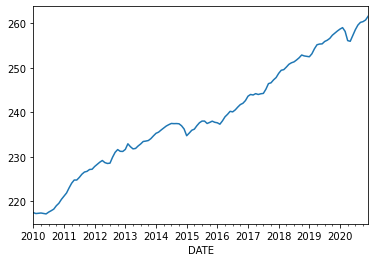

In [9]:
macros1['CPIAUCSL'].plot()

<AxesSubplot:ylabel='Frequency'>

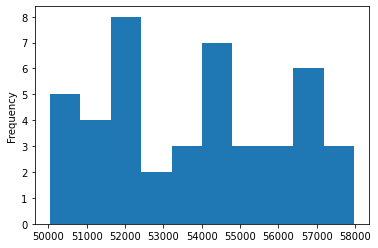

In [10]:
macros1['A939RX0Q048SBEA'].plot(kind ='hist')

**Real GDP per capita is only available 5 times a year** (Jan, April, July, October, December). Because of that we are using the **forward filling function** to replace the NaN with the last known number. 

In [11]:
macros2 = macros1.ffill()
macros2

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10
DATE,,,,,,,,,
2010-01-31,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73
2010-02-28,217.281,76.42,2.60,346895,89.5648,50036.0,9.8,0.13,3.69
2010-03-31,217.353,81.24,2.57,354379,90.2296,50036.0,9.9,0.16,3.73
2010-04-30,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85
2010-05-31,217.290,73.84,2.45,354299,91.8247,50424.0,9.6,0.20,3.42
...,...,...,...,...,...,...,...,...,...
2020-08-31,259.580,42.34,1.77,537980,95.8924,55933.0,8.4,0.10,0.65
2020-09-30,260.190,39.63,1.78,549211,95.6019,55933.0,7.9,0.09,0.68
2020-10-31,260.352,39.40,1.85,548930,96.6454,56533.0,6.9,0.09,0.79


Fragen: 
- Bei welchen Faktoren wollen wir relative und bei welchen absolute Daten bzw. Veränderungen nehmen?

In [12]:
import statsmodels.tsa.stattools as ts

In [13]:
ts.adfuller(macros2['GS10'])

(-2.2174488684864295,
 0.19997358358936268,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -85.72290237683256)

In [14]:
macros2['CPIAUCSL_GR'] = np.round((np.log(macros2['CPIAUCSL']) - np.log(macros2['CPIAUCSL']).shift(1)) * 100, 2)
macros2['WTISPLC_GR'] = np.round((np.log(macros2['WTISPLC']) - np.log(macros2['WTISPLC']).shift(1)) * 100, 2)
macros2['T5YIFRM_GR'] = np.round((np.log(macros2['T5YIFRM']) - np.log(macros2['T5YIFRM']).shift(1)) * 100, 2)
macros2['MRTSSM44X72USS_GR'] = np.round((np.log(macros2['MRTSSM44X72USS']) - np.log(macros2['MRTSSM44X72USS']).shift(1)) * 100, 2)
macros2['INDPRO_GR'] = np.round((np.log(macros2['INDPRO']) - np.log(macros2['INDPRO']).shift(1)) * 100, 2)
macros2['A939RX0Q048SBEA_GR'] = np.round((np.log(macros2['A939RX0Q048SBEA']) - np.log(macros2['A939RX0Q048SBEA']).shift(1)) * 100, 2)
macros2['UNRATE_GR'] = np.round((np.log(macros2['UNRATE']) - np.log(macros2['UNRATE']).shift(1)) * 100, 2)
macros2['FEDFUNDS_GR'] = np.round((np.log(macros2['FEDFUNDS']) - np.log(macros2['FEDFUNDS']).shift(1)) * 100, 2)
macros2['GS10_GR'] = np.round((np.log(macros2['GS10']) - np.log(macros2['GS10']).shift(1)) * 100, 2)
macros2.head()

,CPIAUCSL,WTISPLC,T5YIFRM,MRTSSM44X72USS,INDPRO,A939RX0Q048SBEA,UNRATE,FEDFUNDS,GS10,CPIAUCSL_GR,WTISPLC_GR,T5YIFRM_GR,MRTSSM44X72USS_GR,INDPRO_GR,A939RX0Q048SBEA_GR,UNRATE_GR,FEDFUNDS_GR,GS10_GR
DATE,,,,,,,,,,,,,,,,,,
2010-01-31,217.488,78.22,2.66,345959,89.2744,50036.0,9.8,0.11,3.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,217.281,76.42,2.60,346895,89.5648,50036.0,9.8,0.13,3.69,-0.10,-2.33,-2.28,0.27,0.32,0.00,0.00,16.71,-1.08
2010-03-31,217.353,81.24,2.57,354379,90.2296,50036.0,9.9,0.16,3.73,0.03,6.12,-1.16,2.13,0.74,0.00,1.02,20.76,1.08
2010-04-30,217.403,84.48,2.74,357365,90.5689,50424.0,9.9,0.20,3.85,0.02,3.91,6.41,0.84,0.38,0.77,0.00,22.31,3.17
2010-05-31,217.290,73.84,2.45,354299,91.8247,50424.0,9.6,0.20,3.42,-0.05,-13.46,-11.19,-0.86,1.38,0.00,-3.08,0.00,-11.84


<AxesSubplot:xlabel='DATE'>

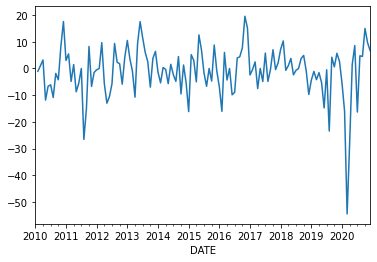

In [15]:
macros2['GS10_GR'].plot()

In [16]:
ts.adfuller(macros2['GS10_GR'][1:])

(-7.8584977320898,
 5.362277417500093e-12,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 851.4834271544592)

In [17]:
import eikon as ek

In [18]:
creds = 'f3c39432c72b4d3cbb3b5412c153b2dfc8acb45e'
ek.set_app_key(creds)

In [19]:
AssetPrices1 = ek.get_symbology(['037833100','654106103', '580135101', '717081103', '30231G102'],from_symbol_type  ='CUSIP',to_symbol_type='RIC')
 
AssetPrices2 = ek.get_timeseries(AssetPrices1.RIC.to_list(),
                       start_date='2010-01-01',end_date='2020-12-31', fields='CLOSE' , interval='monthly')
AssetPrices2

CLOSE,AAPL.O,NKE,MCD,PFE,XOM
Date,,,,,
2010-01-31,6.859386,15.9375,62.43,17.688728,64.43
2010-02-28,7.30785,16.9,63.85,16.636505,65.0
2010-03-31,8.392849,18.375,66.72,16.257325,66.98
2010-04-30,9.324634,18.9775,70.59,15.849707,67.77
2010-05-31,9.174277,18.095,66.87,14.437263,60.46
...,...,...,...,...,...
2020-08-31,129.04,111.89,213.52,35.822993,39.94
2020-09-30,115.81,125.54,219.49,34.789728,34.33
2020-10-31,108.86,120.08,213.0,33.633231,32.62


In [20]:
AssetPrices2 = AssetPrices2.resample(rule = 'M').last()
AssetPrices2

CLOSE,AAPL.O,NKE,MCD,PFE,XOM
Date,,,,,
2010-01-31,6.859386,15.9375,62.43,17.688728,64.43
2010-02-28,7.30785,16.9,63.85,16.636505,65.0
2010-03-31,8.392849,18.375,66.72,16.257325,66.98
2010-04-30,9.324634,18.9775,70.59,15.849707,67.77
2010-05-31,9.174277,18.095,66.87,14.437263,60.46
...,...,...,...,...,...
2020-08-31,129.04,111.89,213.52,35.822993,39.94
2020-09-30,115.81,125.54,219.49,34.789728,34.33
2020-10-31,108.86,120.08,213.0,33.633231,32.62


In [21]:
AssetPrices2.isnull().sum()

CLOSE
AAPL.O    0
NKE       0
MCD       0
PFE       0
XOM       0
dtype: int64

<AxesSubplot:xlabel='Date'>

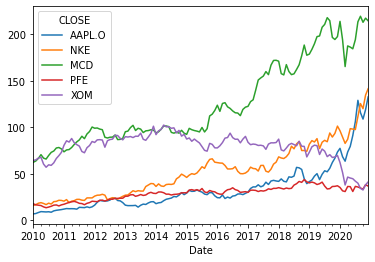

In [22]:
AssetPrices2.plot()

In [23]:
AssetPrices2.describe()

CLOSE,AAPL.O,NKE,MCD,PFE,XOM
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,34.088388,52.377405,125.384318,28.954227,78.705909
std,25.222987,28.015939,45.220986,7.287106,14.697221
min,6.859386,15.937500,62.430000,13.517753,32.620000
25%,17.307108,27.013750,93.727500,23.570752,73.835000
50%,27.123750,50.505000,101.060000,30.443382,81.820000
75%,42.271875,68.262500,163.010000,34.059808,87.382500
max,132.690000,141.470000,219.490000,43.823682,102.410000


In [24]:
ts.adfuller(AssetPrices2['AAPL.O'][1:])

(2.862334311538439,
 1.0,
 7,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 658.3420006357517)

In [25]:
AssetPrices2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2010-01-31 to 2020-12-31
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  132 non-null    Float64
 1   NKE     132 non-null    Float64
 2   MCD     132 non-null    Float64
 3   PFE     132 non-null    Float64
 4   XOM     132 non-null    Float64
dtypes: Float64(5)
memory usage: 6.8 KB


OLS Model funktioniert noch nicht mit online importierten Daten, mit Excel Daten geht es.

In [26]:
import statsmodels.api as sm
y = AssetPrices2['AAPL.O']
x = macros2[['CPIAUCSL_GR', 'WTISPLC_GR', 'T5YIFRM_GR', 'MRTSSM44X72USS_GR', 'INDPRO_GR', 'A939RX0Q048SBEA_GR', 'UNRATE_GR', 'FEDFUNDS_GR', 'GS10_GR']]
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
AssetPrices3 = pd.read_excel('assetprices_.xlsx', index_col = 'Date')
AssetPrices3.head()

In [ ]:
AssetPrices3 = AssetPrices3.resample(rule = 'M').last()
AssetPrices3

In [ ]:
AssetPrices3['AAPL.O_G'] = np.round((np.log(AssetPrices3['AAPL.O']) - np.log(AssetPrices3['AAPL.O']).shift(1)) * 100, 2)
AssetPrices3['MCD_G'] = np.round((np.log(AssetPrices3['MCD']) - np.log(AssetPrices3['MCD']).shift(1)) * 100, 2)
AssetPrices3['NKE_G'] = np.round((np.log(AssetPrices3['NKE']) - np.log(AssetPrices3['NKE']).shift(1)) * 100, 2)
AssetPrices3['XOM_G'] = np.round((np.log(AssetPrices3['XOM']) - np.log(AssetPrices3['XOM']).shift(1)) * 100, 2)
AssetPrices3['PFE_G'] = np.round((np.log(AssetPrices3['PFE']) - np.log(AssetPrices3['PFE']).shift(1)) * 100, 2)
AssetPrices3['.DJI_G'] = np.round((np.log(AssetPrices3['.DJI']) - np.log(AssetPrices3['.DJI']).shift(1)) * 100, 2)
AssetPrices3.head()

In [ ]:
AssetPrices3[['AAPL.O_G']].plot()

In [ ]:
import statsmodels.api as sm
y = AssetPrices3['.DJI_G']
x = macros2[['CPIAUCSL_GR', 'WTISPLC_GR', 'T5YIFRM_GR', 'MRTSSM44X72USS_GR', 'INDPRO_GR', 'A939RX0Q048SBEA_GR', 'UNRATE_GR', 'FEDFUNDS_GR', 'GS10_GR']]
x = sm.add_constant(x)
model = sm.OLS(y,x, missing = 'drop') 
results = model.fit()
print(results.summary())